In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from src.env import *
from src.imports import *
from src.config import *
from src.dataset import *
from src.metric import *

Found cached dataset generator (C:/tempjeka/cache/huggingface/generator/default-f628ff2f2d994b84/0.0.0)
Loading cached split indices for dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-a84cfc0a0e11ed54.arrow and C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-665145fe0a5a6a51.arrow
Loading cached split indices for dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-e104a2bffe25c7fa.arrow and C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-4096519e2393e19f.arrow


<IPython.core.display.Javascript object>

In [3]:
enc_name = "google/mt5-small"
model_name = "mt5_small"

<IPython.core.display.Javascript object>

In [4]:
enc_tokenizer = AutoTokenizer.from_pretrained(enc_name)

C:\tempjeka\anaconda3\lib\site-packages\transformers\convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


<IPython.core.display.Javascript object>

In [5]:
dec_tokenizer = enc_tokenizer

<IPython.core.display.Javascript object>

In [6]:
dataset = create_dataset(enc_tokenizer, dec_tokenizer).sort("input_ids_length")

Loading cached processed dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-e8e63b2a8a7e4ad3.arrow
Loading cached processed dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-d6ceae0a37a67c62.arrow
Loading cached processed dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-0c3f31464f8f7989.arrow
Loading cached sorted indices for dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-bdb4805bd3c0c42c.arrow
Loading cached sorted indices for dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-fc809c3039eedd94.arrow
Loading cached sorted indices for dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-733901f9d738dbc2.arrow


<IPython.core.display.Javascript object>

In [7]:
from transformers import AutoModel

model = AutoModelForSeq2SeqLM.from_pretrained(enc_name)

<IPython.core.display.Javascript object>

In [8]:
model.config.max_length = max_input_length
model.config.min_length = 10
model.config.no_repeat_ngram_size = 3
model.config.early_stopping = True
model.config.num_beams = 10

<IPython.core.display.Javascript object>

In [9]:
version = 1

<IPython.core.display.Javascript object>

In [10]:
version += 1
args = Seq2SeqTrainingArguments(
    output_dir=Path("models") / model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    #     lr_scheduler_type="constant_with_warmup",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    save_total_limit=1,
    num_train_epochs=4,
    predict_with_generate=True,
    warmup_steps=3000,
    fp16=False,
    logging_dir=f"../made/logs/lightning_logs/{model_name}/{version}",
    logging_first_step=False,
    eval_steps=1000,
    logging_steps=500,
    overwrite_output_dir=True,
    group_by_length=True,
)

<IPython.core.display.Javascript object>

In [11]:
trainer = Seq2SeqTrainer(
    model=model,
    args=args,
    compute_metrics=partial(compute_metrics, dec_tokenizer, metric),
    train_dataset=dataset["train"],
    eval_dataset=dataset["val"],
    data_collator=DataCollatorForSeq2Seq(dec_tokenizer, model=model),
)

<IPython.core.display.Javascript object>

In [12]:
trainer.train()

C:\tempjeka\anaconda3\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,Bleu,Gen Len
1000,16.670000,7.664755,0.014361,43.220000
2000,4.359400,2.134417,0.022299,47.840000
3000,2.913600,1.695495,0.080851,63.060000
4000,2.497700,1.483175,0.131925,63.340000
5000,2.245500,1.354940,0.134872,65.520000
6000,2.121300,1.282575,0.140392,69.660000
7000,1.965500,1.199819,0.157548,74.600000
8000,1.886700,1.144614,0.153701,70.920000
9000,1.834500,1.083573,0.172849,72.200000
10000,1.781900,1.058200,0.214244,75.180000


C:\tempjeka\anaconda3\lib\site-packages\transformers\generation\utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 

TrainOutput(global_step=45000, training_loss=2.0930444566514756, metrics={'train_runtime': 10583.3098, 'train_samples_per_second': 17.008, 'train_steps_per_second': 4.252, 'total_flos': 4253584720281600.0, 'train_loss': 2.0930444566514756, 'epoch': 4.0})

<IPython.core.display.Javascript object>

In [13]:
model.save_pretrained(model_name)

<IPython.core.display.Javascript object>

In [7]:
model = EncoderDecoderModel.from_pretrained(model_name)

<IPython.core.display.Javascript object>

In [15]:
metric = evaluate.load("bleu")
model.cuda()
model.eval()
with torch.no_grad():
    dataset["test"].map(
        partial(
            compute_metrics_test,
            model,
            DataCollatorWithPadding(enc_tokenizer),
            dec_tokenizer,
            metric,
            log=False,
        ),
        batched=True,
        batch_size=batch_size,
    )

Map:   0%|          | 0/4950 [00:00<?, ? examples/s]

<IPython.core.display.Javascript object>

In [16]:
metric.compute()

{'bleu': 0.2802308261876972,
 'precisions': [0.5835117292175033,
  0.37066080292324854,
  0.26366016977451273,
  0.18787657125257465],
 'brevity_penalty': 0.8710238680265673,
 'length_ratio': 0.8786682977519961,
 'translation_length': 66799,
 'reference_length': 76023}

<IPython.core.display.Javascript object>

In [14]:
metric = evaluate.load("bleu")
model.cuda()
model.eval()
_idx = 100
with torch.no_grad():
    dataset["test"].select(range(_idx, _idx + 16)).map(
        partial(
            compute_metrics_test,
            model,
            DataCollatorWithPadding(enc_tokenizer),
            dec_tokenizer,
            metric,
            log=True,
        ),
        batched=True,
        batch_size=batch_size,
    )
metric.compute()

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

C:\tempjeka\anaconda3\lib\site-packages\transformers\generation\utils.py:1313: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'input': 'Bed linen is featured.',
  'target': ['Предоставляется постельное белье.'],
  'preds': 'Предоставляется постельное белье.'},
 {'input': 'A fitness room is also available.',
  'target': ['Кроме того, к услугам фитнес-зал.'],
  'preds': 'В распоряжении гостей фитнес-зал.'},
 {'input': 'Free parking is available in the garden',
  'target': ['Гостям предоставляется бесплатная парковка в саду.'],
  'preds': 'На территории отеля обустроена бесплатная парковка.'},
 {'input': 'The property offers free parking.',
  'target': ['На территории дома для отпуска обустроена бесплатная парковка.'],
  'preds': 'На территории обустроена бесплатная парковка.'}]

[{'input': 'Guests benefit from balcony.',
  'target': ['К услугам гостей балкон.'],
  'preds': 'Гости могут воспользоваться балконом.'},
 {'input': 'A business centre is also available.',
  'target': ['На территории работает бизнес-центр.'],
  'preds': 'Кроме того, в распоряжении гостей бизнес-центр.'},
 {'input': 'The property offers free parking.',
  'target': ['Гостям апартаментов предоставляется бесплатная парковка.'],
  'preds': 'На территории обустроена бесплатная парковка.'},
 {'input': 'The property offers free parking.',
  'target': ['Гостям доступна бесплатная парковка.'],
  'preds': 'На территории обустроена бесплатная парковка.'}]

[{'input': 'Some units are split level.',
  'target': ['Некоторые апартаменты занимают 2 этажа.'],
  'preds': 'В некоторых апартаментах имеется отдельная зона.'},
 {'input': 'The property offers free parking.',
  'target': ['Предоставляется бесплатная парковка.'],
  'preds': 'На территории обустроена бесплатная парковка.'},
 {'input': 'It offers free WiFi access.',
  'target': ['К услугам гостей апартаменты с 2 спальнями и бесплатным WiFi.'],
  'preds': 'К услугам гостей бесплатный Wi-Fi.'},
 {'input': 'The lobby is open 24 hours.',
  'target': ['Вестибюль отеля открыт круглосуточно.'],
  'preds': 'На круглосуточной стойке регистрации работает лобби.'}]

[{'input': 'Massages are available on request.',
  'target': ['Также можно заказать различные виды массажа.'],
  'preds': 'По запросу предоставляются массажные процедуры.'},
 {'input': 'The property offers free parking.',
  'target': ['На территории дома предоставляется бесплатная парковка.'],
  'preds': 'На территории обустроена бесплатная парковка.'},
 {'input': 'The property offers free parking.',
  'target': ['Гостям предоставляется бесплатная парковка.'],
  'preds': 'На территории обустроена бесплатная парковка.'},
 {'input': 'The property offers free parking.',
  'target': ['На территории апартаментов обустроена бесплатная парковка.'],
  'preds': 'На территории обустроена бесплатная парковка.'}]

{'bleu': 0.2014668239611586,
 'precisions': [0.4948453608247423,
  0.3333333333333333,
  0.18461538461538463,
  0.061224489795918366],
 'brevity_penalty': 0.9695455377552523,
 'length_ratio': 0.97,
 'translation_length': 97,
 'reference_length': 100}

<IPython.core.display.Javascript object>

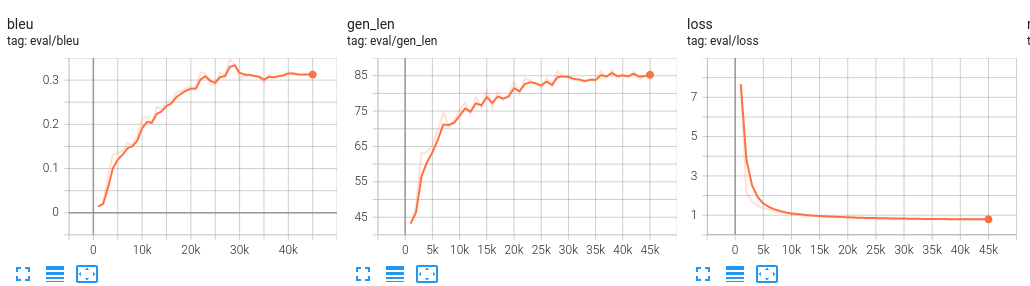 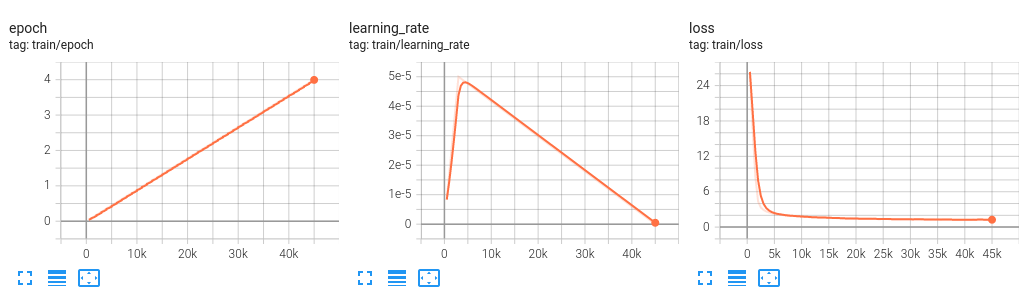